In [ ]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [ ]:
# Importing Libraries
import pandas as pd
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('/content/Heteroaromatics.xlsx')

In [ ]:
df.head()

In [ ]:
# Creating molecular object from Smiles

# PandasTools.AddMoleculeColumnToFrame(df,'Smiles','mol')

In [ ]:
df

**Create an object of the molecule descriptor class**

In [ ]:
mol_list = []

for smile in df['Smiles']:
  mol = Chem.MolFromSmiles(smile)
  mol = Chem.AddHs(mol)
  mol_list.append(mol)

df = pd.concat([df, pd.DataFrame(mol_list, columns = (['mol']))], axis=1)

In [ ]:
df.head()

In [ ]:
Draw.MolsToGridImage(df['mol'][:8],molsPerRow=4,subImgSize=(200,200))

## **Generating Molecular Descriptors Using RDKit**

**Create an instance of the class to print names and number of descriptors**

In [ ]:
Desc_list_func = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList)

In [ ]:
Desc_list_func

**Call the instance to get names**




In [ ]:
names = Desc_list_func.GetDescriptorNames()


**Print the names of descriptors**

In [31]:
names

('MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_

**Print the number of descriptors**

In [32]:
len(names)

208

**Again create an object of the molecule descriptor class**

1.   Get Summary of the descriptors
2.   Generate molecular descriptors



In [33]:
MoleculeDescriptors.MolecularDescriptorCalculator(['MolLogP']).GetDescriptorSummaries()

['Wildman-Crippen LogP value']

In [43]:
# create another instance for calculating molecular descriptors

Des_func = MoleculeDescriptors.MolecularDescriptorCalculator(['NumHeteroatoms', 'NumHDonors'])

In [44]:
Des_func

**Calculate one descriptor for a sinlge molecule**

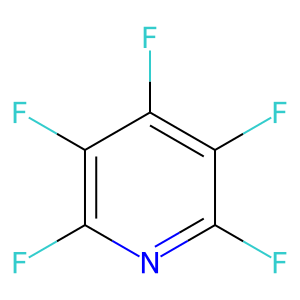

(6,)

In [39]:
display(Draw.MolToImage(df['mol'][12]))
Des_func.CalcDescriptors(df['mol'][12])

**Calculate one or more descriptor for the whole dataset**

In [45]:
des = []

for mol in df['mol']:
  des.append(Des_func.CalcDescriptors(mol))

In [46]:
Final_df = pd.concat([df, pd.DataFrame(des, columns=(['NumHeteroatoms', 'NumHDonors']))], axis=1)


In [47]:
Final_df.head()

,Smiles,mol,NumHeteroatoms,NumHDonors
0,CN1C=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ee5b5629310>,1,0
1,C1=CC=CN1,<rdkit.Chem.rdchem.Mol object at 0x7ee5b5629070>,1,1
2,C1=CN=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ee5b5628d60>,1,0
3,CC1=NC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ee5b56291c0>,1,0
4,CC1=CC=NC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ee5b5628c80>,1,0


**Calculate all the descriptor for the whole dataset**

In [48]:
# create another instance for calculating molecular descriptors

Des_func = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList)

In [49]:
des = []

for mol in df['mol']:
  des.append(Des_func.CalcDescriptors(mol))

In [50]:
Final_df = pd.concat([df, pd.DataFrame(des, columns=(x[0] for x in Descriptors._descList))], axis=1)


In [51]:
Final_df.head()

,Smiles,mol,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CN1C=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ee5b5629310>,7.188079,-2.663426,7.188079,0.386574,0.439206,81.118,74.062,81.057849,...,0,0,0,0,0,0,0,0,0,0
1,C1=CC=CN1,<rdkit.Chem.rdchem.Mol object at 0x7ee5b5629070>,6.969907,-0.407407,6.969907,0.361111,0.465869,67.091,62.051,67.042199,...,0,0,0,0,0,0,0,0,0,0
2,C1=CN=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ee5b5628d60>,7.070741,-0.420370,7.070741,0.397222,0.453148,79.102,74.062,79.042199,...,0,0,0,0,0,0,0,0,0,0
3,CC1=NC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ee5b56291c0>,7.275116,-2.614699,7.275116,0.525000,0.471998,93.129,86.073,93.057849,...,0,0,0,0,0,0,0,0,0,0
4,CC1=CC=NC=C1,<rdkit.Chem.rdchem.Mol object at 0x7ee5b5628c80>,7.275116,-2.650093,7.275116,0.581019,0.471998,93.129,86.073,93.057849,...,0,0,0,0,0,0,0,0,0,0


In [52]:
Final_df.drop('mol', axis=1).to_excel('final.xlsx', index=None)